In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy
from scipy import stats
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import normalize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

query1 = '''
SELECT
  *
FROM
  studentsperformance
'''

df = pd.read_sql_query(query1, con=engine)
engine.dispose()

### 1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?
### 2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.
### 3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

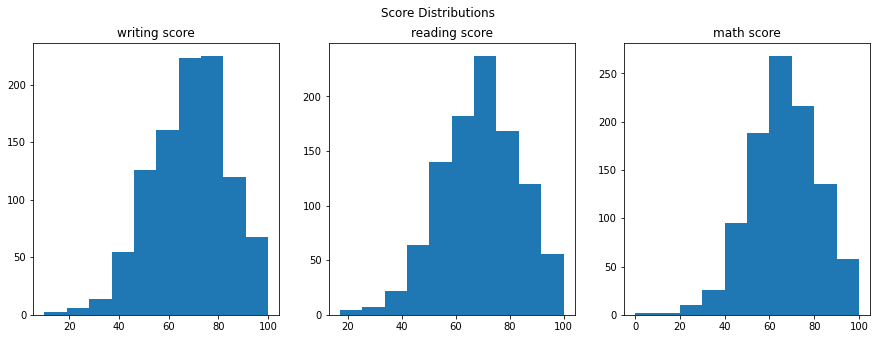

In [4]:
scores = ['writing score', 'reading score', 'math score']

plt.figure(figsize=(15,5))
plt.suptitle('Score Distributions')
for i, score in enumerate(scores):
    plt.subplot(1, 3, i+1)
    plt.hist(df[score])
    plt.title(score)
plt.show()

In [5]:
for score in scores:
    print(score, '\n', '--------------------------------')
    print('Jarque-Bera results:')
    print('Statistic: {} | p-value: {}'.format(jarque_bera(df[score])[0]
                                               , jarque_bera(df[score])[1])
          , '\n')
    
    print('Normality test results:')
    print('Statistic: {} | p-value {}'.format(normaltest(df[score])[0]
                                             ,normaltest(df[score])[1])
         , '\n \n')

writing score 
 --------------------------------
Jarque-Bera results:
Statistic: 13.98509448257235 | p-value: 0.0009187033894586527 

Normality test results:
Statistic: 13.606450837263859 | p-value 0.0011101885439899974 
 

reading score 
 --------------------------------
Jarque-Bera results:
Statistic: 11.383300575987892 | p-value: 0.0033740202672214448 

Normality test results:
Statistic: 11.11741279628622 | p-value 0.003853758403576582 
 

math score 
 --------------------------------
Jarque-Bera results:
Statistic: 15.912256686712709 | p-value: 0.0003505075386818213 

Normality test results:
Statistic: 15.408960513931822 | p-value 0.00045080293869937836 
 



Not normally distributed so we will apply a box-cox treatment

In [9]:
boxcox_math = boxcox(df[df['math score'] > 0]['math score'])[0] 
boxcox_reading = boxcox(df['reading score'])[0]
boxcox_writing = boxcox(df['writing score'])[0]

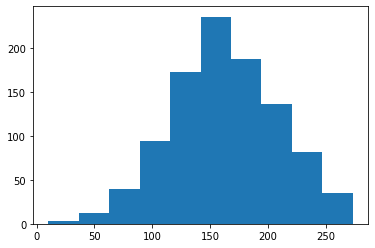

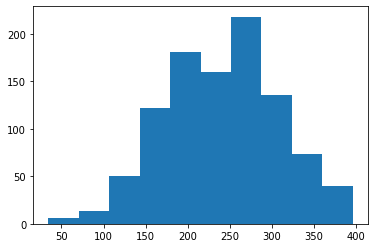

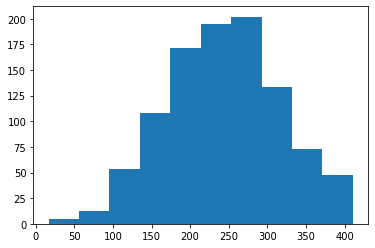

In [10]:
boxcoxed = [boxcox_math, boxcox_reading, boxcox_writing]

for box in boxcoxed:
    plt.hist(box)
    plt.show()

In [11]:
for box in boxcoxed:
    print(score, '\n', '--------------------------------')
    print('Jarque-Bera results:')
    print('Statistic: {} | p-value: {}'.format(jarque_bera(box)[0]
                                               , jarque_bera(box)[1])
          , '\n')
    
    print('Normality test results:')
    print('Statistic: {} | p-value {}'.format(normaltest(box)[0]
                                             ,normaltest(box)[1])
         , '\n \n')

math score 
 --------------------------------
Jarque-Bera results:
Statistic: 1.7200982636836308 | p-value: 0.42314129209599327 

Normality test results:
Statistic: 1.8323075851586939 | p-value 0.4000547794685686 
 

math score 
 --------------------------------
Jarque-Bera results:
Statistic: 4.119778573559666 | p-value: 0.127468081515408 

Normality test results:
Statistic: 5.282274606965809 | p-value 0.07128015626992971 
 

math score 
 --------------------------------
Jarque-Bera results:
Statistic: 4.746478090042761 | p-value: 0.09317842784043195 

Normality test results:
Statistic: 6.267311355052559 | p-value 0.04355827085003712 
 



Jarque-Bera test indicates that these distributions are normal at the 5% confidence interval. 

### 2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

In [12]:
# average the exam scores
df['exam average'] = (df['reading score'] + df['writing score'] + df['math score']) / 3

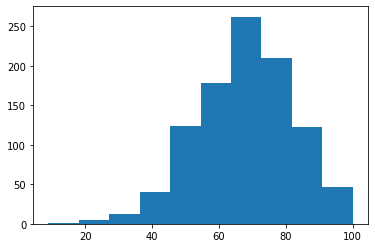

 Jarque-Bera test:  Jarque_beraResult(statistic=15.453387913085168, pvalue=0.00044089934264401887)
Normality Test:  NormaltestResult(statistic=15.186721327231322, pvalue=0.0005037851534494478)


In [14]:
# check the distribution
plt.hist(df['exam average'])
plt.show()

print(' Jarque-Bera test: ', jarque_bera(df['exam average']))

print('Normality Test: ', normaltest(df['exam average']))

In [15]:
# boxcox
df['boxcox average'] = boxcox(df['exam average'])[0]

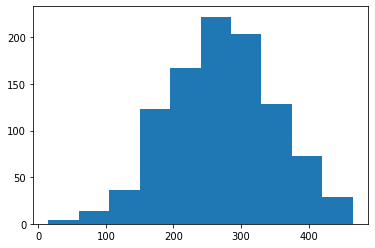

 Jarque-Bera test:  Jarque_beraResult(statistic=2.4353989331279, pvalue=0.2959101356398447)
Normality Test:  NormaltestResult(statistic=2.779857602227616, pvalue=0.24909303914726724)


In [16]:
# check again

plt.hist(df['boxcox average'])
plt.show()

print(' Jarque-Bera test: ', jarque_bera(df['boxcox average']))

print('Normality Test: ', normaltest(df['boxcox average']))

The newly created variable is normally distributed according to the Jarque-Bera test and the normality test after boxcox transformation.

### 3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

In [20]:
(END)
# all of our variables aside from the target are categorical. In this case pairwise ttests between the categories
# for each variable will give us some insight into which hold statistically significant differences


target = 'boxcox average'

variables = df.select_dtypes(include='object')

for variable in variables:
        print(variable, '\n'
             , '-----------------------------------------------------')
        categories = df[variable].unique()
        for i in range(len(categories)):
            for j in range(i+1, len(categories)):
                print('t-test results between {}, and {}:'.format(categories[i], categories[j]))
                print(stats.ttest_ind(df[df[variable] == categories[i]][target]
                             , df[df[variable] == categories[j]][target]))
                print('\n')
        print('\n')           

gender 
 -----------------------------------------------------
t-test results between female, and male:
Ttest_indResult(statistic=4.316845509684089, pvalue=1.74048262157193e-05)




race/ethnicity 
 -----------------------------------------------------
t-test results between group B, and group C:
Ttest_indResult(statistic=-1.2360707349888882, pvalue=0.21700462939442441)


t-test results between group B, and group A:
Ttest_indResult(statistic=1.353419787058621, pvalue=0.1770249547576069)


t-test results between group B, and group D:
Ttest_indResult(statistic=-2.730300728191233, pvalue=0.006576013208968568)


t-test results between group B, and group E:
Ttest_indResult(statistic=-4.545780293277348, pvalue=7.708114163898732e-06)


t-test results between group C, and group A:
Ttest_indResult(statistic=2.4543115711630437, pvalue=0.014534398480186776)


t-test results between group C, and group D:
Ttest_indResult(statistic=-1.7761464532694542, pvalue=0.07623386467070507)


t-test results be

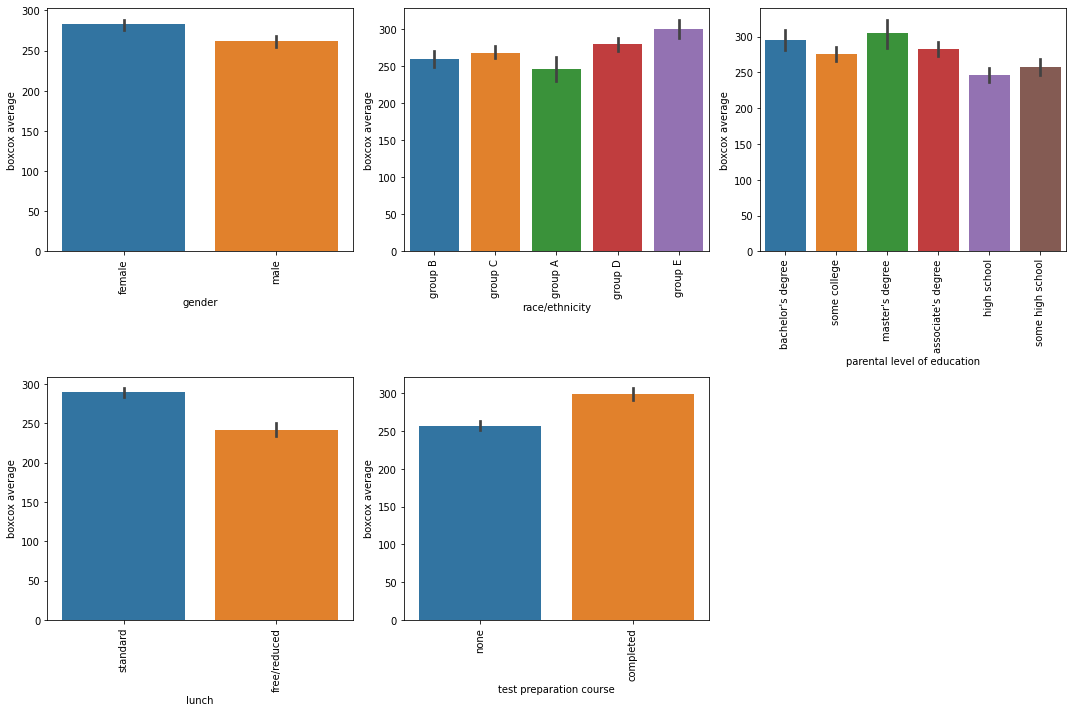

In [33]:
plt.figure(figsize=(15,10))
for i, variable in enumerate(variables):
    plt.subplot(2, 3, i+1)
    sns.barplot(df[variable], df['boxcox average'])
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Lunch has the strongest t-test result followed by test-prep. These two variables therefore are likely to have the greatest impact on our target score. The visual representation helps us see these differences. 